<>:9: SyntaxWarning: invalid escape sequence '\d'
<>:9: SyntaxWarning: invalid escape sequence '\d'
C:\Users\cfkur\AppData\Local\Temp\ipykernel_18116\3319906804.py:9: SyntaxWarning: invalid escape sequence '\d'
  full_df = pd.read_csv('..\data_processing\cleaned_dataset.csv');


Mean squared error: 209.86
R² score: 0.44


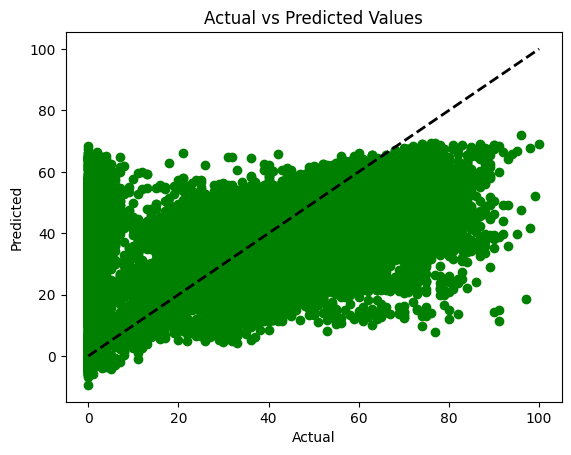

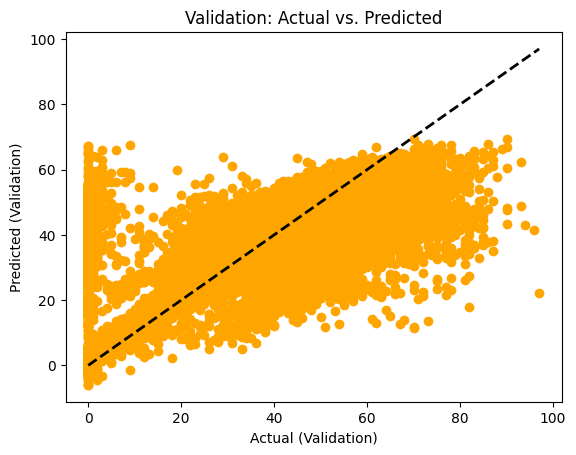

Validation MSE: 220.27966671533255
Validation R² score: 0.4236010920188844


In [9]:
import pandas as pd
import sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Setting up Data Frames and taking random samples
full_df = pd.read_csv('..\data_processing\cleaned_dataset.csv');
train_df = full_df.sample(frac=0.8, random_state=42);
validation_df = full_df.drop(train_df.index);

# Prepare features and target
X = train_df.drop('popularity', axis=1) 
X_Encoded = pd.get_dummies(X, drop_first=True)
y = train_df['popularity']


# Fit linear regression model
regr = linear_model.LinearRegression()
regr.fit(X_Encoded, y)
y_pred = regr.predict(X_Encoded)

#Basic Evaluation
print("Mean squared error: %.2f" % mean_squared_error(y, y_pred))
print("R² score: %.2f" % r2_score(y, y_pred))

#Plotting
plt.scatter(y, y_pred, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2) 
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

# Encoding testing data
X_train_encoded = pd.get_dummies(train_df.drop('popularity', axis=1), drop_first=True)
X_val_encoded = pd.get_dummies(validation_df.drop('popularity', axis=1), drop_first=True)

# Align columns to ensure consistency 
X_val_encoded = X_val_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)
y_val = validation_df['popularity']

#Predictions
y_val_pred = regr.predict(X_val_encoded)

#Plotting Comparisons
plt.scatter(y_val, y_val_pred, color='orange')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2)
plt.xlabel('Actual (Validation)')
plt.ylabel('Predicted (Validation)')
plt.title('Validation: Actual vs. Predicted')
plt.show()

#Evaluation on validation set
print("Validation MSE:", mean_squared_error(y_val, y_val_pred))
print("Validation R² score:", r2_score(y_val, y_val_pred))

